# Airbnb Analysis

In [3]:
#Magic plots after each cell
%matplotlib inline

#Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
#Read clean file and convert to CSV
data_file = pd.read_csv("Resources/CleanAirbnbData.csv")
abb_df = pd.DataFrame(data_file)
abb_df.head()

,ID,Name,Host ID,Host Name,Neighbourhood Group,Neighbourhood,Latitude,Longitude,Room Type,Price,Minimum Nights,Number of Reviews,Last Review,Reviews per Month,Calculated Host Listings Count,Availability
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [5]:
#Create dictionary for most up to date population by data by borough (2018 estimates by nyc.gov)
pop_dict = {'Brooklyn': 2582830,
            'Bronx': 1432132,
            'Manhattan': 1628701,
            'Queens': 2278906,
            'Staten Island': 476179
           }

## Who is using Airbnb in NYC?

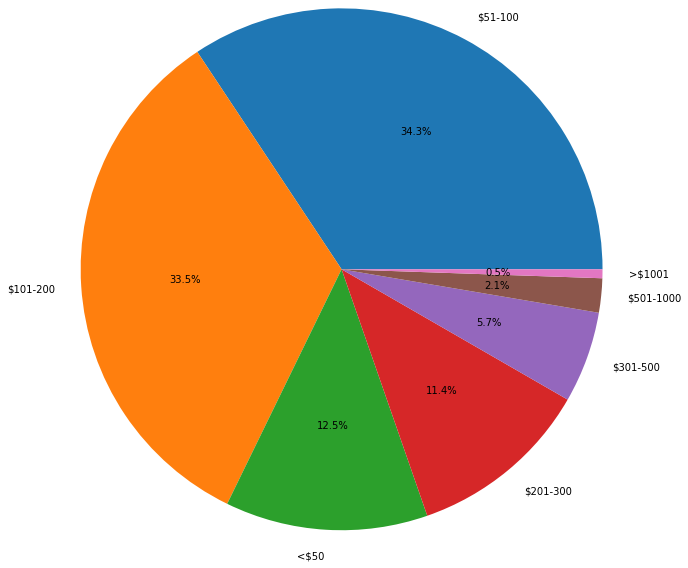

In [8]:
price_bins = [0,50,100,200,300,500,1000, max(abb_df['Price'])]
price_group_names =["<$50","$51-100","$101-200","$201-300","$301-500","$501-1000",">$1001"]
abb_df["Price categories"] = pd.cut(abb_df["Price"], price_bins, labels=price_group_names)

Price_Demographics = pd.DataFrame(abb_df["Price categories"].value_counts())
plt.pie(Price_Demographics['Price categories'],labels=Price_Demographics.index,autopct="%1.1f%%",radius=3)
plt.savefig("Output/Price Demographics")
# plt.show()

In [12]:
# List Demographics
list_bins = [0,1,5, 10, 20,30,50,100,200,max(abb_df['Calculated Host Listings Count'])]
list_group_names =['1_list','5 and under','10 and under','20 and under','30 and under','50 and under','100 and under','200 and under','201 and more']
abb_df["List Categories"] = pd.cut(abb_df["Calculated Host Listings Count"], list_bins, labels=list_group_names)
List_Demographics = pd.DataFrame(abb_df["List Categories"].value_counts())
List_Demographics.reset_index()
total_list = len(abb_df["ID"]) 
List_Demographics["Percentage of listing"]= round(List_Demographics["List Categories"]/ total_list *100,2)
List_Demographics.rank(axis=0, numeric_only=False)
List_Demographics

,List Categories,Percentage of listing
1_list,17393,55.46
5 and under,9370,29.88
10 and under,1731,5.52
20 and under,712,2.27
201 and more,559,1.78
50 and under,556,1.77
100 and under,526,1.68
30 and under,302,0.96
200 and under,213,0.68


([<matplotlib.patches.Wedge at 0x22b89fb5a90>,
 [Text(-0.5632804357866928, 3.2515711818534676, '1_list'),
  Text(-0.9405636419660512, -3.1631218812134887, '5 and under'),
  Text(2.419742525097467, -2.243846276426916, '10 and under'),
  Text(2.891312371422828, -1.5906956876968337, '20 and under'),
  Text(3.06978649374, -1.2109545337672583, '30 and under'),
  Text(3.1854887829800957, -0.861777937468806, '50 and under'),
  Text(3.260017639476507, -0.5121376673337225, '100 and under'),
  Text(3.291238708780579, -0.24030763996250765, '200 and under'),
  Text(3.299247012948681, -0.07049218076643325, 'more than 201')],
 [Text(-0.30724387406546877, 1.7735842810109819, '55.5%'),
  Text(-0.5130347137996643, -1.72533920793463, '29.9%'),
  Text(1.3198595591440727, -1.2239161507783176, '5.5%'),
  Text(1.5770794753215425, -0.8676521932891819, '2.3%'),
  Text(1.6744289965854542, -0.6605206547821407, '1.8%'),
  Text(1.737539336170961, -0.47006069316480326, '1.8%'),
  Text(1.7781914397144578, -0.279347

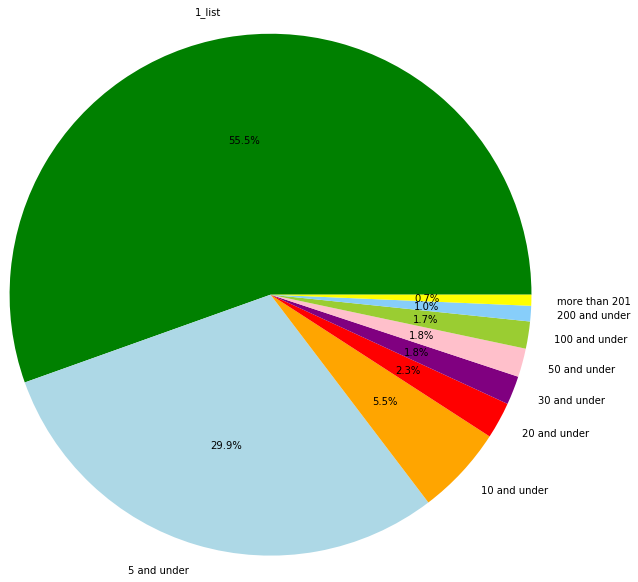

In [14]:
lists = ['1_list','5 and under','10 and under','20 and under','30 and under','50 and under','100 and under','200 and under','more than 201']
pie_x = List_Demographics["Percentage of listing"]
colors = ["green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","yellow"]
plt.pie(pie_x, labels=lists,colors=colors,autopct="%1.1f%%",radius=3)

## How is Airbnb used in the different boroughs? 

## How do the demographics for each borough affect their Airbnb use? 

## What other external variables may be factors for Airbnb's usage in each area?